# refarch-kc-streams 

In [13]:
!pip -q install json  # this worked before
## For redis Access
!pip -q install redis
import redis
import json
import time 
import pandas as pd
import sys
sys.path.append("../streams/creds")
from creds import credential
import time
import numpy as np
## setup fo plotting
#%matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib notebook
import numpy as np

  Could not find a version that satisfies the requirement json (from versions: )
No matching distribution found for json


In [14]:
# setup the class to read data 

class FetchRedis(object):
    """ Get current price of from Redis"""

    def __init__(self):
        # put this in the config file....
        connect = credential.redisCredential
        self.red = redis.Redis(host=connect['host'],port=connect['port'],password=connect['password'])

    def raw(self, key):
        return self.red.get(key)
    
    def currentDict(self, key):
        """
        :return the raw object recieved
        """
        res = str(self.red.get(key), 'utf-8')
        return(json.loads(res))
      
    def fetchValue(self, key):
        dict = self.currentDict(key)
        return(dict)
    
    def sendValue(self, key, value):
        return(self.red.set(key, value))
        
        
f = FetchRedis()

In [15]:
# f.sendValue("/score/bluewater","{'id': 'Reefxxx', 'oTemp': 18.3}")

In [16]:
# f.sendValue("/score/bluewater", json.dumps(d))

In [17]:
data = f.fetchValue("/score/bluewater")
print("len of full data", len(data))
reef1 = [[ele['oTemp'],ele['amp']] for ele in data if ele['id']=='Reefer_0']
print("len of reef1,", len(reef1))

len of full data 10000
len of reef1, 1000


# basic plotting 
- draw simple graph
- two plots on same graph. 
- updating loop

<IPython.core.display.Javascript object>


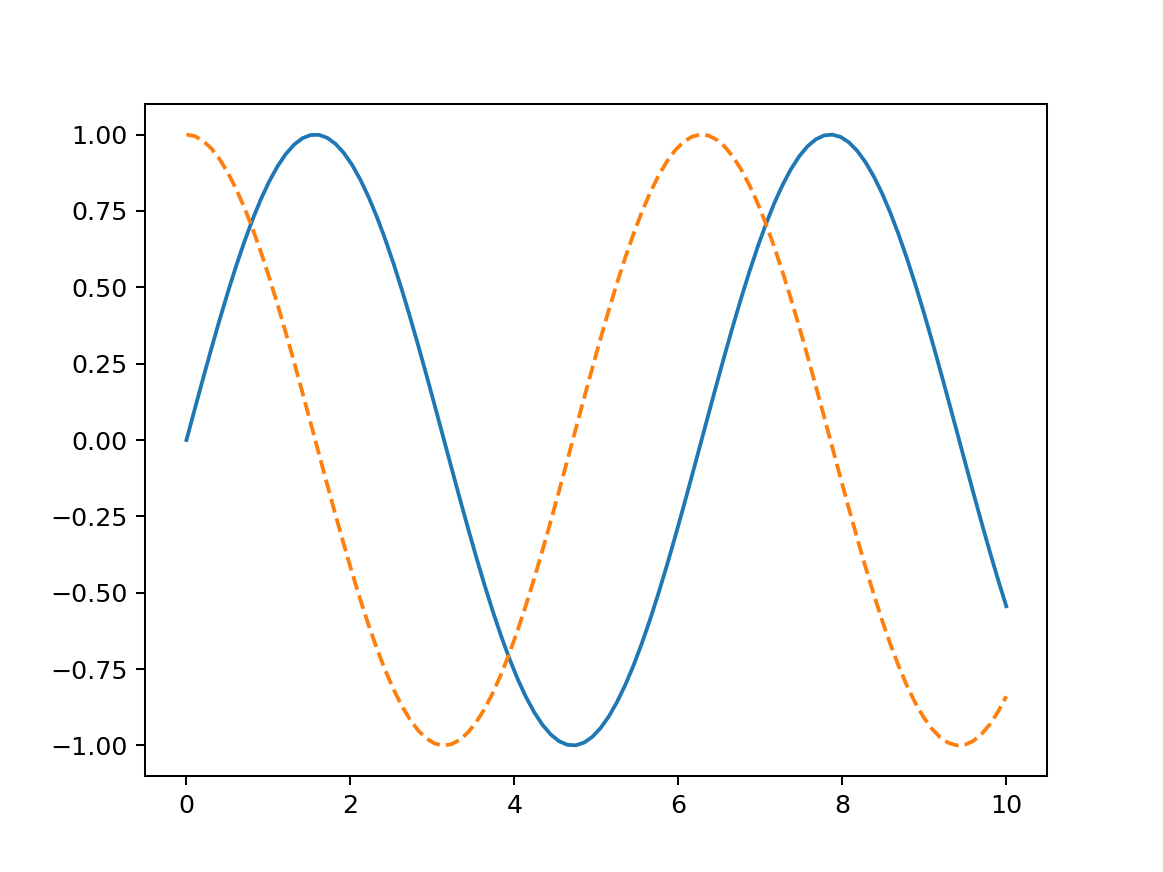

In [18]:
# does it work. 
x = np.linspace(0,10,100)
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')


## Fetch Data and Plot
- Fetch data plot temp + amp
- Linear regression of temp/amp to see where it's trending

<IPython.core.display.Javascript object>


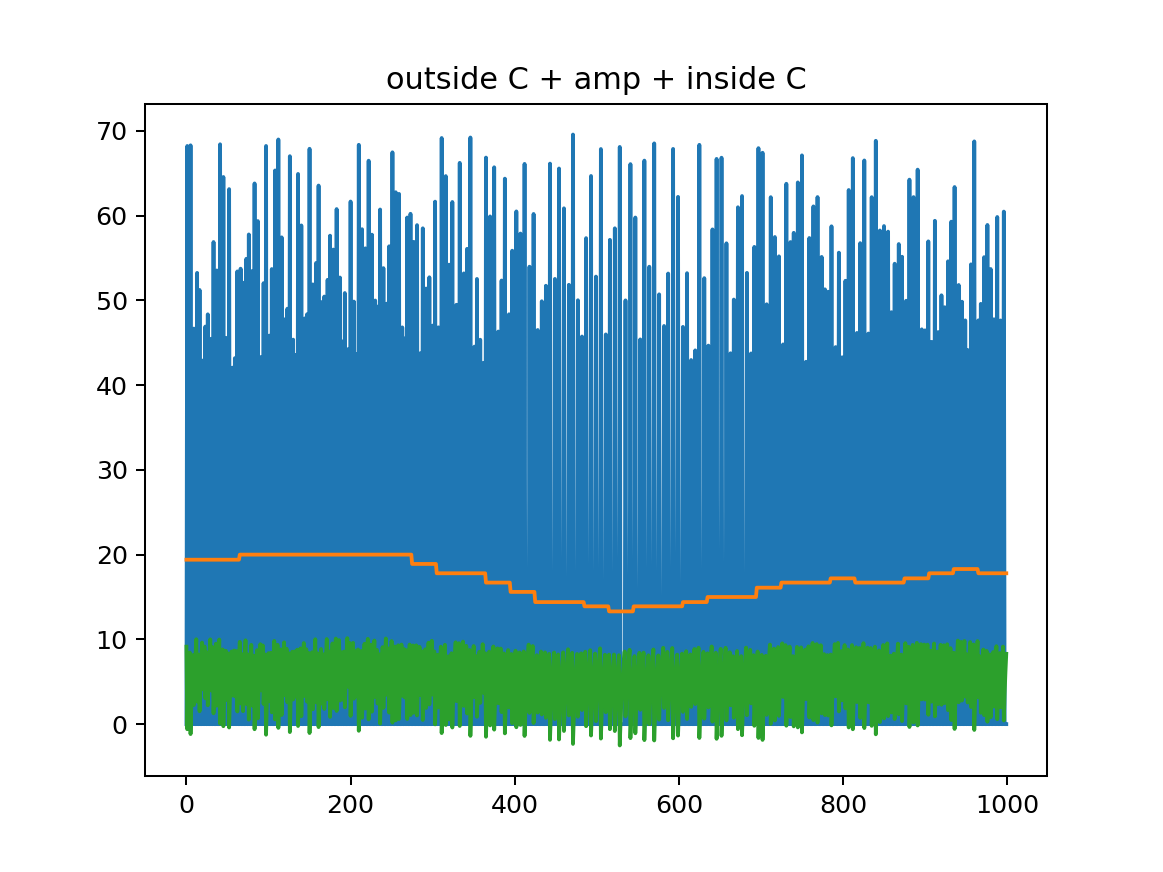

In [19]:
data = f.fetchValue("/score/bluewater")
%matplotlib notebook
oTemp = [ele['oTemp'] for ele in data if ele['id']=='Reefer_0']
amp= [ele['amp'] for ele in data if ele['id']=='Reefer_0']
tempC =  [ele['tempC'] for ele in data if ele['id']=='Reefer_0']
plt . plot ( amp [ : ] )
plt . plot ( oTemp [ : ] )
plt . plot ( tempC [ : ] )
plt.title("outside C + amp + inside C")
plt . show ( )

<IPython.core.display.Javascript object>


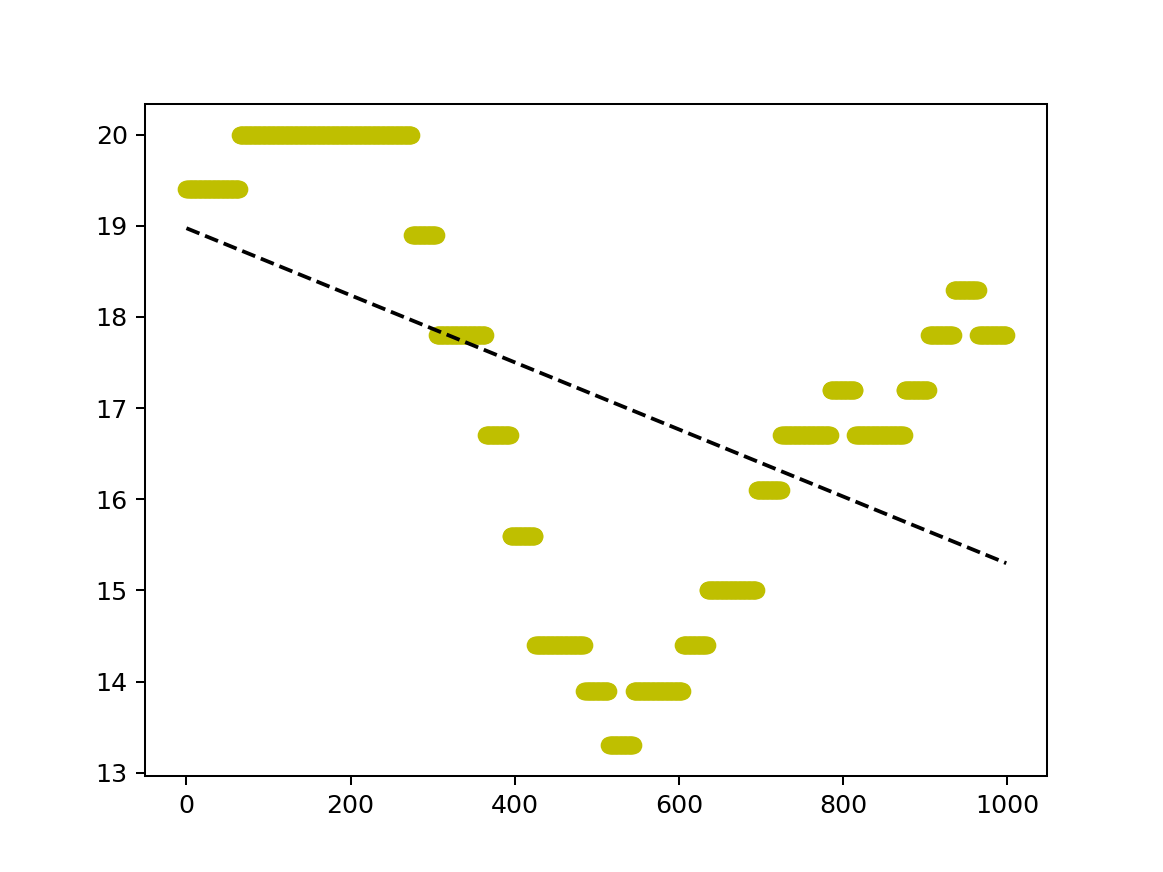

In [20]:
x = [x for x in range(len(oTemp))]
y = oTemp
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
fig = plt.figure()
plt.plot(x,y, 'yo', x, fit_fn(x), '--k')


<IPython.core.display.Javascript object>


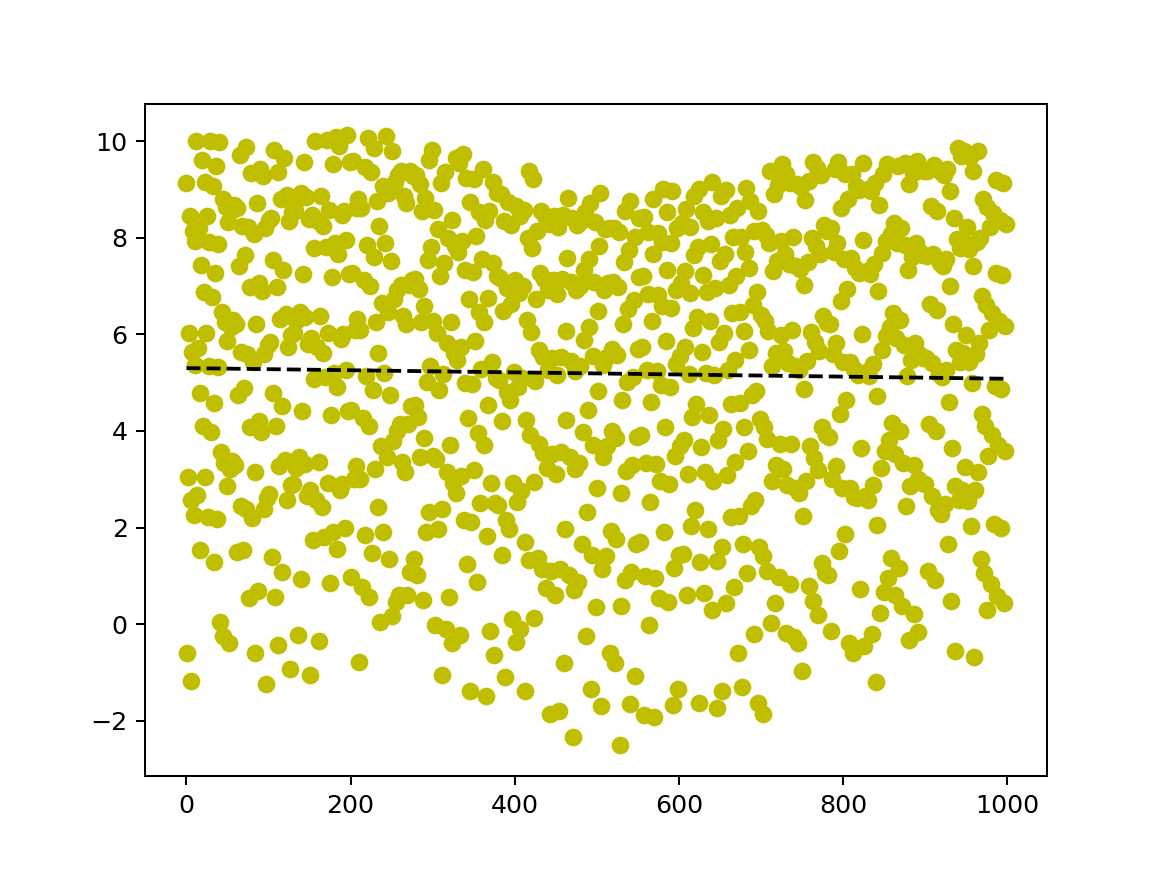

In [21]:
x = [x for x in range(len(tempC))]
y = tempC
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
fig = plt.figure()
plt.plot(x,y, 'yo', x, fit_fn(x), '--k')

<IPython.core.display.Javascript object>


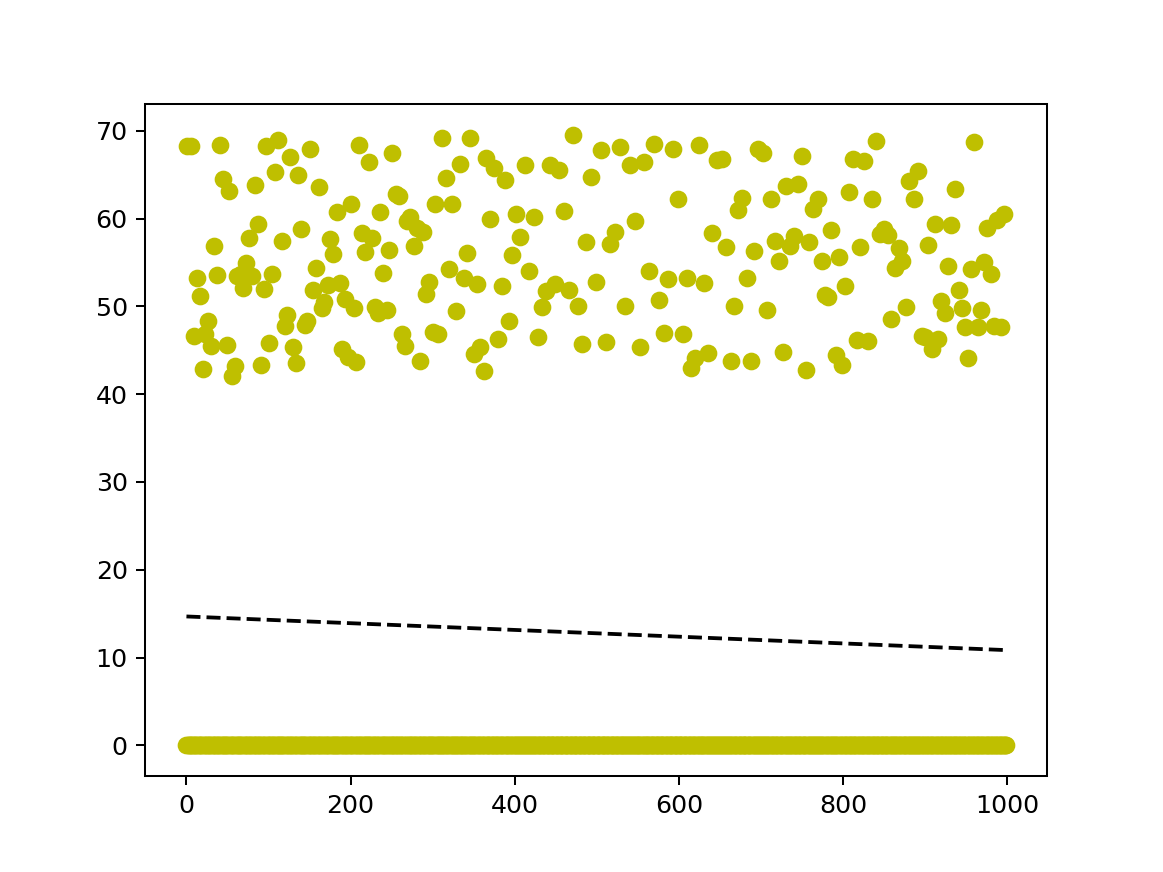

In [22]:
x = [x for x in range(len(oTemp))]
y = amp
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
fig = plt.figure()
plt.plot(x,y, 'yo', x, fit_fn(x), '--k')

<IPython.core.display.Javascript object>


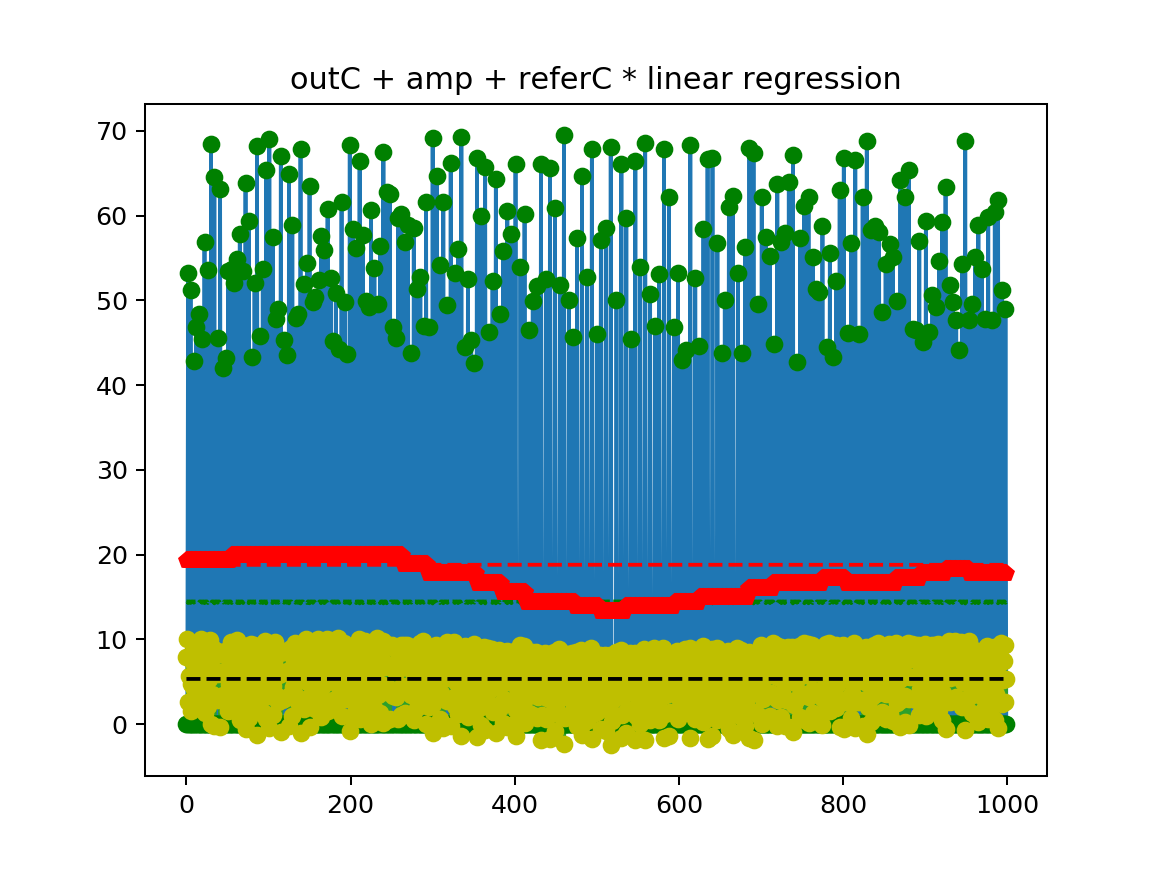

Text(0.5,1,'outC + amp + referC * linear regression')

In [23]:
data = f.fetchValue("/score/bluewater")
%matplotlib notebook
oTemp = [ele['oTemp'] for ele in data if ele['id']=='Reefer_0']
amp= [ele['amp'] for ele in data if ele['id']=='Reefer_0']
tempC= [ele['tempC'] for ele in data if ele['id']=='Reefer_0']
plt . plot ( amp [ : ] )
plt . plot ( oTemp [ : ] )
plt . plot ( tempC [ : ] )
plt.title("temp + amp")
plt . show ( )

x = [x for x in range(len(oTemp))]
fitO = np.polyfit(x,oTemp,1)
fit_fnO = np.poly1d(fitO) 
fitC = np.polyfit(x,tempC,1)
fit_fnC = np.poly1d(fitC) 
fitA = np.polyfit(x,amp,1)
fit_fnA = np.poly1d(fitA) 
# fit_fn is now a function which takes in x and returns an estimate for y
plt.plot(x,amp, 'go', x, fit_fnA(amp), '--g')
plt.plot(x,oTemp, 'rp', x, fit_fnO(oTemp), '--r')
plt.plot(x,tempC, 'yo', x, fit_fnC(tempC), '--k')

plt.title("outC + amp + referC * linear regression")



# Updating graph

<IPython.core.display.Javascript object>


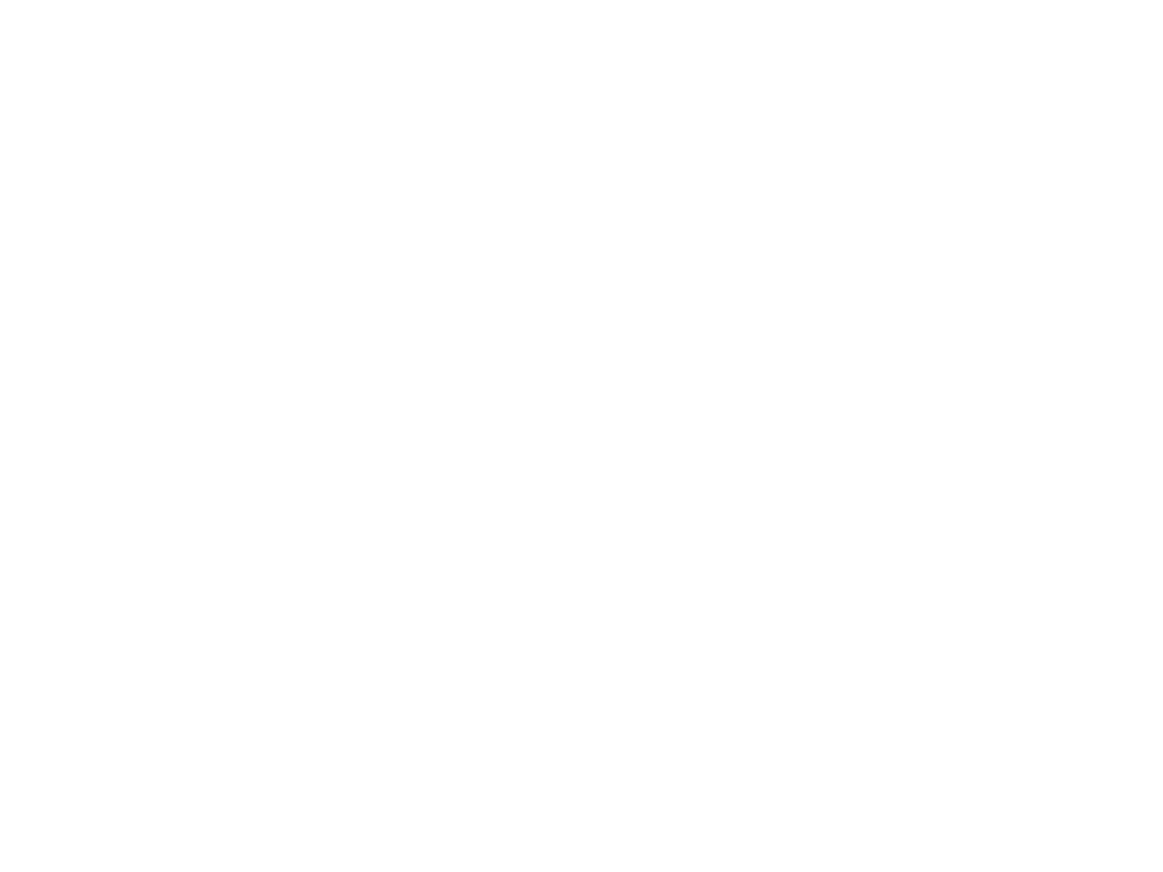

<IPython.core.display.Javascript object>


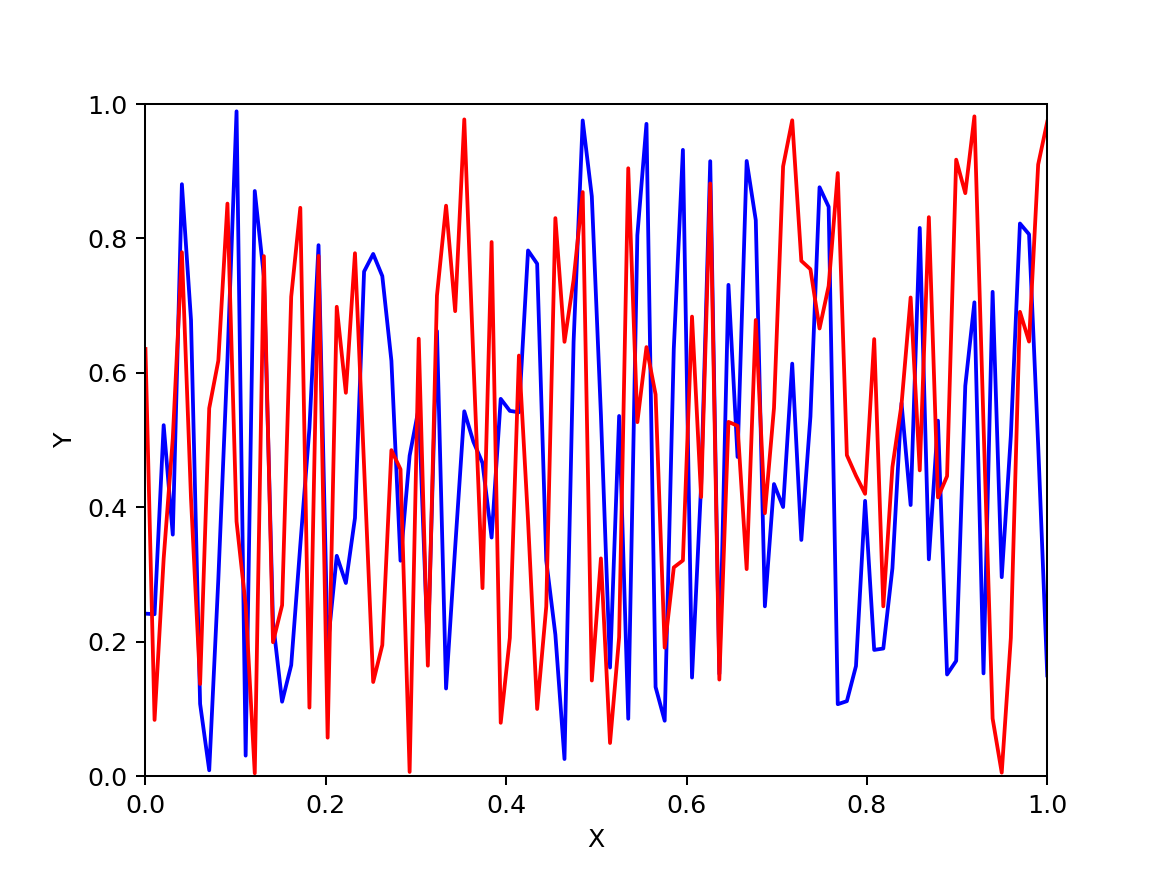

In [25]:
## verify that it works.
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline
import numpy as np
import time
fig = plt.figure()
def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)